#Import Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cur_path = '/content/drive/MyDrive/Colab Notebooks/ds5460/final_project/'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
shots_all=pd.read_csv(cur_path+'shot_attempts_all.csv')
shots_all.head()

,game_id,quarter,game_clock,q_game_clock,join_clock,ball_id,ball_team_id,ball_x_loc,ball_y_loc,p1_id,p1_team_id,p1_x_loc,p1_y_loc,p2_id,p2_team_id,p2_x_loc,p2_y_loc,p3_id,p3_team_id,p3_x_loc,p3_y_loc,p4_id,p4_team_id,p4_x_loc,p4_y_loc,p5_id,p5_team_id,p5_x_loc,p5_y_loc,p6_id,p6_team_id,p6_x_loc,p6_y_loc,p7_id,p7_team_id,p7_x_loc,p7_y_loc,p8_id,p8_team_id,p8_x_loc,...,p10_team_id,p10_x_loc,p10_y_loc,event_id,shot_distance,action_type,eventtime,event_type,game_date,grid_type,htm,loc_x,loc_y,minutes_remaining,period,shooter_id,player_name,seconds_remaining,shot_attempted_flag,shot_made_flag,shot_time,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_team_id,team_name,vtm,q_event_clock,name,p1_dist_from_ball,p2_dist_from_ball,p3_dist_from_ball,p4_dist_from_ball,p5_dist_from_ball,p6_dist_from_ball,p7_dist_from_ball,p8_dist_from_ball,p9_dist_from_ball,p10_dist_from_ball
0,21500118,1,10.81,1010.81,215001181010,-1,-1,88.58073,47.23678,1717,1610612742,83.81143,22.43934,2734,1610612742,79.28948,33.02286,200826,1610612742,79.42200,26.53512,101111,1610612742,68.28476,46.65023,1626147,1610612742,88.64105,40.48683,1718,1610612746,68.03859,40.71217,2037,1610612746,60.18301,17.74136,2746,1610612746,84.14743,...,1610612746,88.18894,12.58677,131,22,Jump Shot,9,Made Shot,20151111,Shot Chart Detail,DAL,213.2677,10.7913,0,1,202325,Wesley Johnson,9,1,1,10.93,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,1610612746,LA Clippers,LAC,1009,join_clock_1,25.251916,16.981250,22.637161,20.304444,6.750220,21.553423,40.943990,26.906010,0.060198,34.652225
1,21500118,1,34.82,1034.82,215001181034,-1,-1,19.72510,38.33816,1717,1610612742,12.09649,21.24264,2734,1610612742,15.21928,41.52094,200826,1610612742,21.16722,26.28253,101111,1610612742,20.54730,38.29605,1626147,1610612742,22.04690,45.70366,1718,1610612746,22.89819,34.05611,2037,1610612746,12.55717,39.61459,2746,1610612746,6.63603,...,1610612746,14.66415,28.79042,129,18,Pullup Jump shot,32,Made Shot,20151111,Shot Chart Detail,DAL,-132.9991,159.7706,0,1,101111,Charlie Villanueva,32,1,1,34.98,2PT Field Goal,Left Side(L),Mid-Range,16-24 ft.,1610612742,Dallas Mavericks,LAC,1032,join_clock_2,18.720376,5.516566,12.141578,0.823278,7.722781,5.329583,7.280693,19.003480,18.202907,10.806135
2,21500118,1,75.11,1075.11,215001181075,-1,-1,5.07477,27.30752,1717,1610612742,30.11233,26.86569,2734,1610612742,26.65421,39.39143,200826,1610612742,28.06034,42.92889,101111,1610612742,5.77957,31.94396,1626147,1610612742,6.11990,25.82237,1718,1610612746,6.46879,32.04652,2037,1610612746,0.00000,19.36170,2746,1610612746,7.14406,...,1610612746,9.29558,30.90732,123,1,Driving Reverse Layup Shot,73,Made Shot,20151111,Shot Chart Detail,DAL,-46.0883,265.1111,1,1,1626147,Justin Anderson,13,1,1,96.30,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612742,Dallas Mavericks,LAC,1073,join_clock_2,25.041458,24.732430,27.791431,4.689703,1.816031,4.939779,9.428115,3.260305,7.047434,5.547414
3,21500118,1,96.34,1096.34,215001181096,-1,-1,63.16144,20.32074,1717,1610612742,89.48804,21.89405,2734,1610612742,76.93189,38.98618,200826,1610612742,68.40022,16.99631,101111,1610612742,69.23388,24.92869,1626147,1610612742,82.73441,12.61714,1718,1610612746,62.22048,20.31882,2037,1610612746,72.73196,43.64095,2746,1610612746,92.15049,...,1610612746,70.56709,4.43752,121,24,Jump Shot,93,Missed Shot,20151111,Shot Chart Detail,DAL,-46.0883,265.1111,1,1,1718,Paul Pierce,33,1,0,96.30,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612746,LA Clippers,LAC,1093,join_clock_3,26.373570,23.195343,6.204567,7.622843,21.034415,0.940962,25.207678,29.016448,30.794489,17.524849
4,21500118,1,112.74,1112.74,215001181112,-1,-1,8.62189,35.09709,1717,1610612742,8.27183,35.57660,2734,1610612742,10.70757,2.67683,200826,1610612742,6.90357,13.18547,101111,1610612742,31.29840,25.44636,1626147,1610612742,16.91998,12.39846,1718,1610612746,13.76686,27.94412,2037,1610612746,18.87184,16.43204,2746,1610612746,6.81804,...,1610612746,9.93184,22.82639,120,9,Turnaro

#Calculate closest defender to the shooter

I calculated closest defender to the shooter. This includes the distance as well as the coordinates on the court

In [ ]:
lst=list(shots_all['shot_team_id'])
closest_player=[]
closest_dist=[]
closest_x=[]
closest_y=[]
for i in range(len(shots_all)):
  shooter_team = lst[i]
  min_dist = 9999
  for j in range(-10,0,1):
    if j == -1:
      p_id = shots_all.columns[j][0:3]
    else:
      p_id = shots_all.columns[j][0:2]
    p_team = shots_all[p_id+'_team_id'].iloc[i]
    dist = shots_all.iloc[i,j]
    player = shots_all[p_id+'_id'].iloc[i]
    x_loc = shots_all[p_id+'_x_loc'].iloc[i]
    y_loc = shots_all[p_id+'_y_loc'].iloc[i]
    if (p_team != shooter_team) and (dist < min_dist):
      min_dist=dist
      p_id_closest = player
      x_loc_closest = x_loc
      y_loc_closest = y_loc
  closest_dist.append(min_dist)
  closest_player.append(p_id_closest)
  closest_x.append(x_loc_closest)
  closest_y.append(y_loc_closest)


#Shooter location
Calculating the coordinates of the shooter

In [ ]:
shooter_x=[]
shooter_y=[]
for i in range(len(shots_all)):
  shooter = shots_all['shooter_id'].iloc[i]
  for j in range(1,11,1):
    p_id = shots_all['p'+str(j)+'_id'].iloc[i]
    if (shooter==p_id):
      x_loc = shots_all['p'+str(j)+'_x_loc'].iloc[i]
      y_loc = shots_all['p'+str(j)+'_y_loc'].iloc[i]
      break
  shooter_x.append(x_loc)
  shooter_y.append(y_loc)

In [ ]:
shots_all['p_id_closest'] = closest_player
shots_all['closest_dist'] = closest_dist
shots_all['x_loc_closest'] = closest_x
shots_all['y_loc_closest'] = closest_y
shots_all['shooter_x_loc']=shooter_x
shots_all['shooter_y_loc']=shooter_y
shots_all.head()

,game_id,quarter,game_clock,q_game_clock,join_clock,ball_id,ball_team_id,ball_x_loc,ball_y_loc,p1_id,p1_team_id,p1_x_loc,p1_y_loc,p2_id,p2_team_id,p2_x_loc,p2_y_loc,p3_id,p3_team_id,p3_x_loc,p3_y_loc,p4_id,p4_team_id,p4_x_loc,p4_y_loc,p5_id,p5_team_id,p5_x_loc,p5_y_loc,p6_id,p6_team_id,p6_x_loc,p6_y_loc,p7_id,p7_team_id,p7_x_loc,p7_y_loc,p8_id,p8_team_id,p8_x_loc,...,eventtime,event_type,game_date,grid_type,htm,loc_x,loc_y,minutes_remaining,period,shooter_id,player_name,seconds_remaining,shot_attempted_flag,shot_made_flag,shot_time,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,shot_team_id,team_name,vtm,q_event_clock,name,p1_dist_from_ball,p2_dist_from_ball,p3_dist_from_ball,p4_dist_from_ball,p5_dist_from_ball,p6_dist_from_ball,p7_dist_from_ball,p8_dist_from_ball,p9_dist_from_ball,p10_dist_from_ball,p_id_closest,closest_dist,x_loc_closest,y_loc_closest,shooter_x_loc,shooter_y_loc
0,21500118,1,10.81,1010.81,215001181010,-1,-1,88.58073,47.23678,1717,1610612742,83.81143,22.43934,2734,1610612742,79.28948,33.02286,200826,1610612742,79.42200,26.53512,101111,1610612742,68.28476,46.65023,1626147,1610612742,88.64105,40.48683,1718,1610612746,68.03859,40.71217,2037,1610612746,60.18301,17.74136,2746,1610612746,84.14743,...,9,Made Shot,20151111,Shot Chart Detail,DAL,213.2677,10.7913,0,1,202325,Wesley Johnson,9,1,1,10.93,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,1610612746,LA Clippers,LAC,1009,join_clock_1,25.251916,16.981250,22.637161,20.304444,6.750220,21.553423,40.943990,26.906010,0.060198,34.652225,1626147,6.750220,88.64105,40.48683,88.53623,47.27732
1,21500118,1,34.82,1034.82,215001181034,-1,-1,19.72510,38.33816,1717,1610612742,12.09649,21.24264,2734,1610612742,15.21928,41.52094,200826,1610612742,21.16722,26.28253,101111,1610612742,20.54730,38.29605,1626147,1610612742,22.04690,45.70366,1718,1610612746,22.89819,34.05611,2037,1610612746,12.55717,39.61459,2746,1610612746,6.63603,...,32,Made Shot,20151111,Shot Chart Detail,DAL,-132.9991,159.7706,0,1,101111,Charlie Villanueva,32,1,1,34.98,2PT Field Goal,Left Side(L),Mid-Range,16-24 ft.,1610612742,Dallas Mavericks,LAC,1032,join_clock_2,18.720376,5.516566,12.141578,0.823278,7.722781,5.329583,7.280693,19.003480,18.202907,10.806135,1718,5.329583,22.89819,34.05611,20.54730,38.29605
2,21500118,1,75.11,1075.11,215001181075,-1,-1,5.07477,27.30752,1717,1610612742,30.11233,26.86569,2734,1610612742,26.65421,39.39143,200826,1610612742,28.06034,42.92889,101111,1610612742,5.77957,31.94396,1626147,1610612742,6.11990,25.82237,1718,1610612746,6.46879,32.04652,2037,1610612746,0.00000,19.36170,2746,1610612746,7.14406,...,73,Made Shot,20151111,Shot Chart Detail,DAL,-46.0883,265.1111,1,1,1626147,Justin Anderson,13,1,1,96.30,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612742,Dallas Mavericks,LAC,1073,join_clock_2,25.041458,24.732430,27.791431,4.689703,1.816031,4.939779,9.428115,3.260305,7.047434,5.547414,2746,3.260305,7.14406,24.78807,6.11990,25.82237
3,21500118,1,96.34,1096.34,215001181096,-1,-1,63.16144,20.32074,1717,1610612742,89.48804,21.89405,2734,1610612742,76.93189,38.98618,200826,1610612742,68.40022,16.99631,101111,1610612742,69.23388,24.92869,1626147,1610612742,82.73441,12.61714,1718,1610612746,62.22048,20.31882,2037,1610612746,72.73196,43.64095,2746,1610612746,92.15049,...,93,Missed Shot,20151111,Shot Chart Detail,DAL,-46.0883,265.1111,1,1,1718,Paul Pierce,33,1,0,96.30,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612746,LA Clippers,LAC,1093,join_clock_3,26.373570,23.195343,6.204567,7.622843,21.034415,0.940962,25.207678,29.016448,30.794489,17.524849,200826,6.204567,68.40022,16.99631,62.22048,20.31882
4,21500118,1,112.74,1112.74,215001181112,-1,-1,8.62189,35.09709,1717,1610612742,8.27183,35.57660,2734,1610612742,10.70757,2.67683,200826,1610612742,6.90357,13.18547,101111,1610612742,31.29840,25.44636,1626147,1610612742,16.91998,12.39846,1718,1610612746,13.76686,27.94412,2037,1610612746,18.87184,16.43204,2746,1610612746,6.81804,...,110,Made Shot,20151111,Shot 

In [ ]:
shots_all.to_csv(cur_path+'shot_attempt_all(1).csv')

#Random EDA

In [ ]:
#finding shot zones
shot_zones = list(shots_all['shot_zone_basic'].unique())
shot_zones = shot_zones[0:-1]

['Right Corner 3',
 'Mid-Range',
 'Restricted Area',
 'Above the Break 3',
 'In The Paint (Non-RA)',
 'Left Corner 3']

In [ ]:
#Calculating shooting percentage for each zone
zone_per=[]
for zone in shot_zones:
  percentage = (shots_all[shots_all['shot_zone_basic']==zone]['shot_made_flag'].sum())/len(shots_all[shots_all['shot_zone_basic']==zone])
  zone_per.append(percentage)
zone_per

[0.3679085520745131,
 0.39492428323457235,
 0.618951252901613,
 0.34696270242544147,
 0.4007223942208462,
 0.3671089666264576]

In [ ]:
#points per shot for each zone
points_per_shot=[]
for zone in shot_zones:
  percentage = (shots_all[shots_all['shot_zone_basic']==zone]['shot_made_flag'].sum())/len(shots_all[shots_all['shot_zone_basic']==zone])
  if '3' in zone:
    exp_points = 3*percentage
    points_per_shot.append(exp_points)
  else:
    exp_points = 2*percentage
    points_per_shot.append(exp_points)
points_per_shot

[1.1037256562235394,
 0.7898485664691447,
 1.237902505803226,
 1.0408881072763245,
 0.8014447884416924,
 1.1013268998793728]

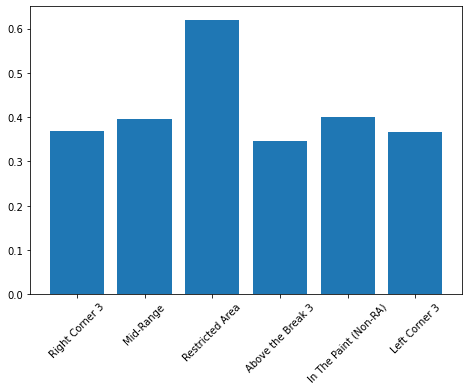

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(shot_zones,zone_per)
ax.set_xticklabels(shot_zones, rotation=45)
plt.show()

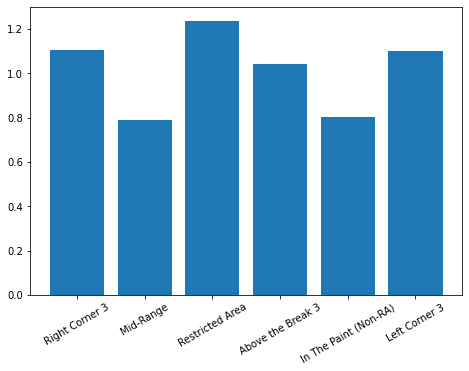

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(shot_zones,points_per_shot)
ax.set_xticklabels(shot_zones, rotation=30)
plt.show()